In [43]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
x_data = np.linspace(0.0,10.0,1000000)

In [13]:
noise = np.random.randn(len(x_data))

In [14]:
y_true = (0.5 * x_data) + 5 + noise

In [5]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

In [6]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': None, '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_train_distribute': None, '_save_checkpoints_steps': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f72f2fc9908>, '_is_chief': True, '_master': '', '_save_checkpoints_secs': 600, '_service': None, '_evaluation_master': '', '_num_ps_replicas': 0, '_task_type': 'worker', '_session_config': None, '_global_id_in_cluster': 0, '_num_worker_replicas': 1, '_model_dir': '/tmp/tmpvvmqiujj', '_log_step_count_steps': 100}


In [15]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3,
                                                   random_state=101)

In [48]:
print(x_train.shape)

(700000,)


In [17]:
x_eval.shape

(300000,)

In [18]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, 
                                                batch_size=8, num_epochs=None,shuffle=True)

In [19]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, 
                                                batch_size=8, num_epochs=1000,shuffle=False)

In [20]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval}, y_eval, 
                                                batch_size=8, num_epochs=1000,shuffle=False)

In [21]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpvvmqiujj/model.ckpt.
INFO:tensorflow:step = 1, loss = 431.646
INFO:tensorflow:global_step/sec: 642.359
INFO:tensorflow:step = 101, loss = 13.284 (0.157 sec)
INFO:tensorflow:global_step/sec: 929.319
INFO:tensorflow:step = 201, loss = 8.32015 (0.108 sec)
INFO:tensorflow:global_step/sec: 824.963
INFO:tensorflow:step = 301, loss = 8.10145 (0.121 sec)
INFO:tensorflow:global_step/sec: 980.998
INFO:tensorflow:step = 401, loss = 11.8229 (0.102 sec)
INFO:tensorflow:global_step/sec: 883.638
INFO:tensorflow:step = 501, loss = 8.48499 (0.113 sec)
INFO:tensorflow:global_step/sec: 930.533
INFO:tensorflow:step = 601, loss = 5.71177 (0.107 sec)
INFO:tensorflow:global_step/sec: 928.204
INFO:tensorflow:step = 701, los

In [22]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-20-00:01:21
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpvvmqiujj/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-08-20-00:01:23
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.08897, global_step = 1000, loss = 8.71177


In [23]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-20-00:02:26
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpvvmqiujj/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-08-20-00:02:28
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.09658, global_step = 1000, loss = 8.77263


In [24]:
print('TRINING DATA METRICS')
print(train_metrics)

TRINING DATA METRICS
{'global_step': 1000, 'loss': 8.7117682, 'average_loss': 1.088971}


In [26]:
print('EVAL DATA METRICS')
print(eval_metrics)

EVAL DATA METRICS
{'global_step': 1000, 'loss': 8.7726307, 'average_loss': 1.0965788}


In [27]:
brand_new_data = np.linspace(0,10,10)

In [28]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},
                                                     shuffle=False)

In [31]:
estimator.predict(input_fn=input_fn_predict)

<generator object Estimator.predict at 0x7f72dcf88ca8>

In [32]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpvvmqiujj/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [37]:
predictions

[array([ 4.45057058], dtype=float32),
 array([ 5.0950489], dtype=float32),
 array([ 5.73952675], dtype=float32),
 array([ 6.38400459], dtype=float32),
 array([ 7.02848291], dtype=float32),
 array([ 7.67296076], dtype=float32),
 array([ 8.31743908], dtype=float32),
 array([ 8.96191692], dtype=float32),
 array([ 9.60639572], dtype=float32),
 array([ 10.25087357], dtype=float32)]

In [39]:
x_df= pd.DataFrame(data=x_data, columns=['X Data'])

In [40]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [41]:
my_data = pd.concat([x_df, y_df], axis=1)

In [45]:
my_data.head()

,X Data,Y
0,0.00000,4.649753
1,0.00001,5.178143
2,0.00002,4.369282
3,0.00003,5.376461
4,0.00004,5.564999


In [46]:
%matplotlib inline

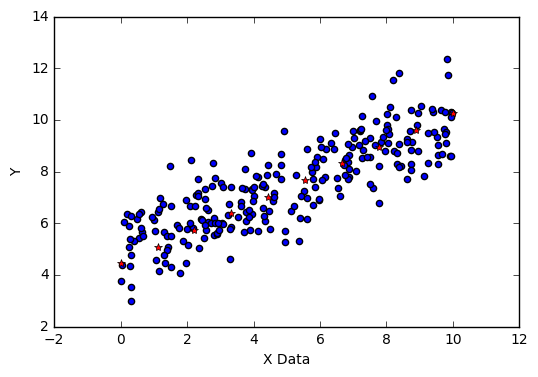

In [47]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y= 'Y')
plt.plot(brand_new_data, predictions, 'r*')